# Introductory applied machine learning (INFR10069)

# Assignment 4: Feature Engineering

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.


## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 4 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn 0.17
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. **You are welcome to split your answer into multiple cells with intermediate printing.**

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions), unless stated otherwise.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [1]:
from __future__ import print_function, division
%matplotlib inline

In [36]:
# Your code goes here
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
%matplotlib inline

## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [43]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]

### ========== Question 1.1 ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

In [4]:
print(X)
print(X.describe)
print("X:", X.shape, "y:", y.shape)

print(y)

      abc   ability      able   ac    accept  access  according  acquired  \
0     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
1     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
2     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
3     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
4     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
5     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
6     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
7     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
8     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.133553       0.0   
9     0.0  0.420916  0.000000  0.0  0.000000     0.0   0.000000       0.0   
10    0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
11    0.0  0.000000  0.097542  0.0  0.000000     0.0   0.000000       0.0   

The X variable is the frequency of the 1000 words that appear in the transformed, sparse newsgroup training data. The y variable is showing the category of the 2845 occurrences (either baseball, hockey, pc hardware, mac hardware, or atheism). 

### ========== Question 1.2 ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [5]:
kmeans = KMeans(n_clusters=5, random_state=1).fit(X)

### ========== Question 1.3 ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [6]:
from sklearn.metrics.cluster import adjusted_rand_score
#NUMBER 1 NOT FINISHED
print(kmeans.inertia_)
print(adjusted_rand_score(y, kmeans.labels_))


2593.08412389
0.200235231312


Inertia is the sum of squared distance for each points its assigned cluster and how reasonable the cluster centers are. Adjusted rand score shows the likeness between two cluster centers.  
The quality of the clustering based on the adjusted rand score is not terribly good considering a perfect score is 1 and 0 means the clusters are completely independent.

### ========== Question 1.4 ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

In [7]:
label_0 = []
label_1 = []
label_2 = []
label_3 = []
label_4 = []


pos = 0
for i in X.data:
    if(i > 0):
        
        if(kmeans.labels_[pos] == 0):
            label_0.append(i)
        if(kmeans.labels_[pos] == 1):
            label_1.append(i)
        if(kmeans.labels_[pos] == 2):
            label_2.append(i)
        if(kmeans.labels_[pos] == 3):
            label_3.append(i)
        else:
            label_4.append(i)
        
        pos = pos + 1
    else:
        pos = pos + 1
        
print(len(label_0))
        
print(len(label_1))
        
print(len(label_2))
        
print(len(label_3))
        
print(len(label_4))

1
28
19
4
92


In [8]:


clus_0 = []
clus_1 = []
clus_2 = []
clus_3 = []
clus_4 = []
for i in kmeans.labels_:
    if(i == 0):
        clus_0.append(i)
    elif(i == 1):
        clus_1.append(i)
    elif(i == 2):
        clus_2.append(i)
    elif(i == 3):
        clus_3.append(i)
    else:
        clus_4.append(i)
        

print("The number of data points in label alt.atheism:", len(clus_0))
print("The number of data points in label comp.sys.ibm.pc.hardware:", len(clus_1))
print("The number of data points in label comp.sys.mac.hardware:", len(clus_2))
print("The number of data points in label rec.sport.baseball:", len(clus_3))
print("The number of data points in label rec.sport.hockey:", len(clus_4))

The number of data points in label alt.atheism: 309
The number of data points in label comp.sys.ibm.pc.hardware: 218
The number of data points in label comp.sys.mac.hardware: 1136
The number of data points in label rec.sport.baseball: 660
The number of data points in label rec.sport.hockey: 522


### ========== Question 1.5 ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [9]:
from scipy import reshape, sqrt, identity
from numpy import mat, zeros, newaxis
def calcDistanceMatrixEuclidean(nDimPoints):
    nDimPoints = np.array(nDimPoints)
    n,m = nDimPoints.shape
    delta = zeros((n,n),'d')
    for d in xrange(m):
        data = nDimPoints[:,d]
        delta += (data - data[:,newaxis])**2
    return sqrt(delta)


calcDistanceMatrixEuclidean(kmeans.cluster_centers_)    

array([[ 0.        ,  0.41304357,  0.23502706,  0.2944397 ,  0.3084101 ],
       [ 0.41304357,  0.        ,  0.33685701,  0.40442632,  0.3318722 ],
       [ 0.23502706,  0.33685701,  0.        ,  0.20215334,  0.19878248],
       [ 0.2944397 ,  0.40442632,  0.20215334,  0.        ,  0.29940014],
       [ 0.3084101 ,  0.3318722 ,  0.19878248,  0.29940014,  0.        ]])

### ========== Question 1.6 ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

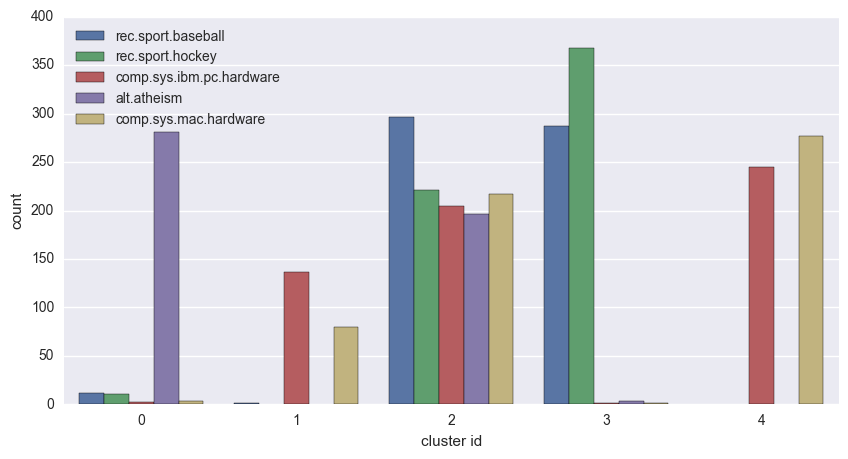

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x=kmeans.labels_, hue=y, ax=ax)
plt.xlabel('cluster id')
plt.show()

Cluster 0 seems to have the most stable results, meaning every label is well represented. In the other cluster centers, there seems to be a dominant label. 

### ========== Question 1.7 ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better

In [47]:
n_comp=[1,2,3,5,10,20,50,100,500,1000]
adj_arr = []
for n in n_comp:
    pca = PCA(n_components=n)
    X1 = pca.fit_transform(X)
    kmeans2 = KMeans(n_clusters=5, random_state=0).fit(X1)
    print("Iteration with n_component value of ", n)
    print(kmeans2.inertia_)
    adj = adjusted_rand_score(y, kmeans2.labels_)
    adj_arr.append(adj)
    print(adj)
    

Iteration with n_component value of  1
2.82199065984
0.210101502256
Iteration with n_component value of  2
10.59329323
0.268194567638
Iteration with n_component value of  3
20.4233010148
0.238732152267
Iteration with n_component value of  5
49.8679237709
0.223425585583
Iteration with n_component value of  10
118.179759499
0.217701953337
Iteration with n_component value of  20
231.926428725
0.206239296724
Iteration with n_component value of  50
492.330450662
0.214539950219
Iteration with n_component value of  100
820.117001173
0.211852614456
Iteration with n_component value of  500
2143.57174637
0.21748257219
Iteration with n_component value of  1000
2593.12491875
0.223076425762


[0.21010150225577132, 0.2681945676377313, 0.23873215226748273, 0.22342558558253955, 0.21770195333724335, 0.20623929672422495, 0.2145399502189542, 0.2118526144556824, 0.21748257219005104, 0.22307642576171138]


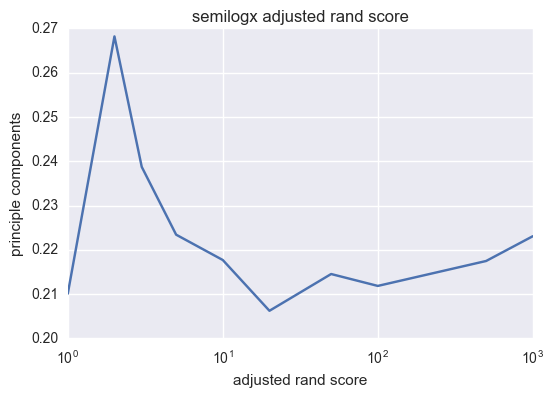

In [54]:
print(adj_arr)

plt.plot()
plt.semilogx(n_comp, adj_arr)
plt.title('semilogx adjusted rand score')
plt.xlabel('adjusted rand score')
plt.ylabel('principle components')
plt.grid(True)


The plot shows the adjusted rand score against the number of principle components. The plot shows one noticeable peak at component 2, but most of the adjusted rand scores are similar in value. 
We cannot use inertia to choose the principal components. The inertia does not indicate at all that component 2 would produce the best results. It simply increases and shows no significance. 
Dimensionality reduction can help kmeans perform better because it improves the visulaity of the results. After removing dimensions, it shows the similarities or variances in the data more clearly. 

### ========== Question 1.8 ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

0.268194567638


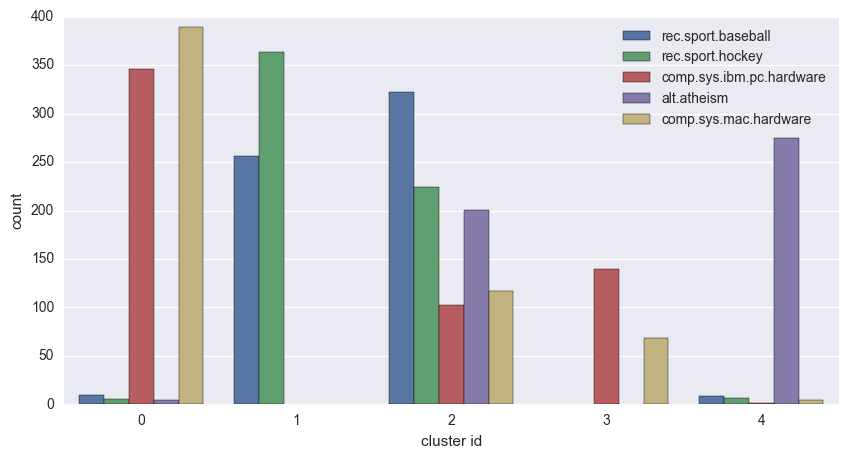

In [55]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
kmeans_pca = KMeans(n_clusters=5, random_state=0).fit(X_2d)
print(adjusted_rand_score(y, kmeans_pca.labels_))
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x=kmeans_pca.labels_, hue=y, ax=ax)
plt.xlabel('cluster id')
plt.show()
#number 4 not done

In [13]:
clus_0 = []
clus_1 = []
clus_2 = []
clus_3 = []
clus_4 = []
for i in kmeans_pca.labels_:
    if(i == 0):
        clus_0.append(i)
    elif(i == 1):
        clus_1.append(i)
    elif(i == 2):
        clus_2.append(i)
    elif(i == 3):
        clus_3.append(i)
    else:
        clus_4.append(i)
        

print("The number of data points in label alt.atheism:", len(clus_0))
print("The number of data points in label comp.sys.ibm.pc.hardware:", len(clus_1))
print("The number of data points in label comp.sys.mac.hardware:", len(clus_2))
print("The number of data points in label rec.sport.baseball:", len(clus_3))
print("The number of data points in label rec.sport.hockey:", len(clus_4))

The number of data points in label alt.atheism: 754
The number of data points in label comp.sys.ibm.pc.hardware: 620
The number of data points in label comp.sys.mac.hardware: 967
The number of data points in label rec.sport.baseball: 208
The number of data points in label rec.sport.hockey: 296


I think these clusters are better because they are more evenly clustered. Instead of having one dominant label in each cluster, the clusters in this plot shows a better distribution (except cluster 4). 

### ========== Question 1.9 ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

In [14]:
print(kmeans_pca.labels_)
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
labels_interp = np.array(cats)[kmeans_pca.labels_]
print(labels_interp)

[2 1 1 ..., 3 1 2]
['comp.sys.mac.hardware' 'comp.sys.ibm.pc.hardware'
 'comp.sys.ibm.pc.hardware' ..., 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware']


### ========== Question 1.10 ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y, labels_interp)
cm

array([[  4,   0, 201,   0, 275],
       [346,   0, 103, 140,   1],
       [389,   0, 117,  68,   4],
       [ 10, 256, 322,   0,   9],
       [  5, 364, 224,   0,   7]])

In [16]:
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
cm_norm

array([[ 0.00833333,  0.        ,  0.41875   ,  0.        ,  0.57291667],
       [ 0.58644068,  0.        ,  0.17457627,  0.23728814,  0.00169492],
       [ 0.67301038,  0.        ,  0.20242215,  0.11764706,  0.00692042],
       [ 0.01675042,  0.42881072,  0.53936348,  0.        ,  0.01507538],
       [ 0.00833333,  0.60666667,  0.37333333,  0.        ,  0.01166667]])

In [17]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('kmeans clustering labels')

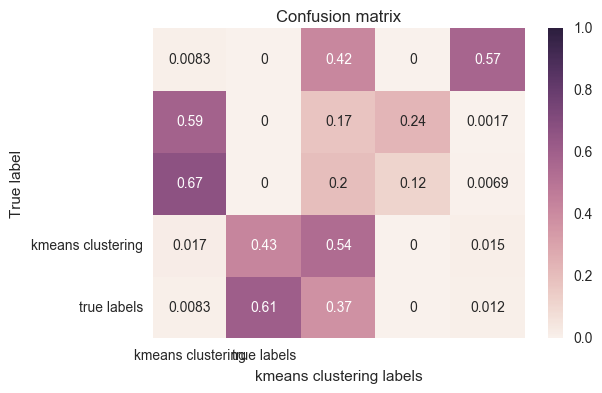

In [18]:

# Your code goes here
plt.figure()
plot_confusion_matrix(cm_norm, classes=['kmeans clustering', 'true labels'])

### ========== Question 1.11 ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

In [19]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(79 * '_')

Automatically created module for IPython interactive environment
n_digits: 10, 	 n_samples 1797, 	 n_features 64
_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
k-means++   0.27s    69432   0.602   0.650   0.625   0.465   0.598    0.146
   random   0.37s    69694   0.669   0.710   0.689   0.553   0.666    0.147
PCA-based   0.05s    71820   0.673   0.715   0.693   0.567   0.670    0.150
_______________________________________________________________________________


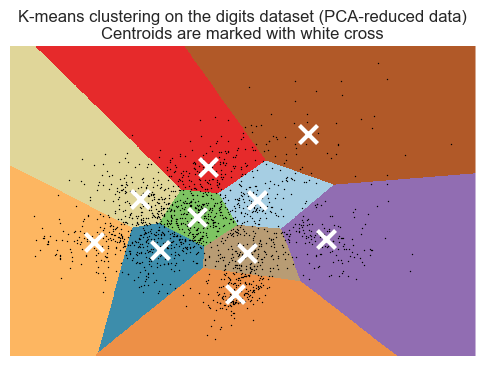

In [20]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### ========== Question 1.12  ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

The kmeans algorithm can be deterministic because we know the data beforehand. 
Yes, the algorithm ran above do multiple initialisations. 
Another method for initializing is the random method. A problem with this method is that the means will be too similar and it might choose centers that are too nearby.

## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 2.1 ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. Print the max/min values for each dimension
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

In [21]:
print(digits.keys())
df = pd.DataFrame(digits['data'])
df.describe()


['images', 'data', 'target_names', 'DESCR', 'target']


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [22]:
print("Minimum values for data:")
print(df.min())
print("Max values for data:")    
print(df.max())

    

Minimum values for data:
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
     ... 
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
51    0.0
52    0.0
53    0.0
54    0.0
55    0.0
56    0.0
57    0.0
58    0.0
59    0.0
60    0.0
61    0.0
62    0.0
63    0.0
dtype: float64
Max values for data:
0      0.0
1      8.0
2     16.0
3     16.0
4     16.0
5     16.0
6     16.0
7     15.0
8      2.0
9     16.0
10    16.0
11    16.0
12    16.0
13    16.0
14    16.0
15    12.0
16     2.0
17    16.0
18    16.0
19    16.0
20    16.0
21    16.0
22    16.0
23     8.0
24     1.0
25    15.0
26    16.0
27    16.0
28    16.0
29    16.0

In [23]:
stds = []
for i in df:
    stds.append(np.std(df[i]))

std_df = pd.DataFrame(stds)


ValueError: total size of new array must be unchanged

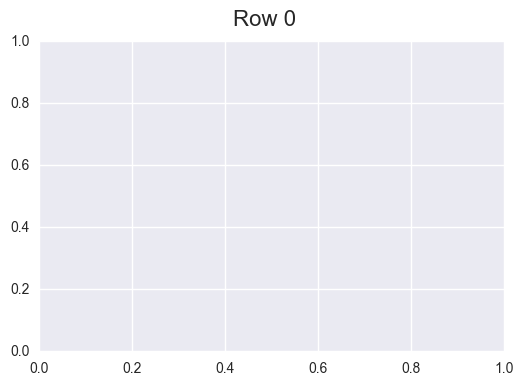

In [24]:
def get_images(row, bands=None):    
    if bands is None:
        img = [[]] * 1
        for ii in range(1):
            img[ii] = row[[1*p + ii for p in range(8)]].reshape((8,8)).astype(int)
    elif isinstance(bands, int):
        img = row[[1*p + bands for p in range(8)]].reshape((8,8)).astype(int)
    elif isinstance(bands, list):
        img = [[]] * len(bands)
        for ii, band in enumerate(bands):
            img[ii] = row[[1*p + band for p in range(8)]].reshape((8,8)).astype(int)
    return img

for ii in range(1):
    fig, ax = plt.subplots(1,1)
    plt.suptitle('Row {}'.format(ii), fontsize=16)
    for jj, img in enumerate(get_images(std_df.iloc[ii,:])):
        ax[jj] = sns.heatmap(img, annot=True, fmt="d", ax=ax[jj], vmin=0, vmax=255, 
                    cbar=False, square=True, cmap=plt.cm.gray)
        ax[jj].invert_yaxis()
        ax[jj].set_title('Band {}'.format(jj))
    plt.tight_layout()
    plt.subplots_adjust(top=1.4)

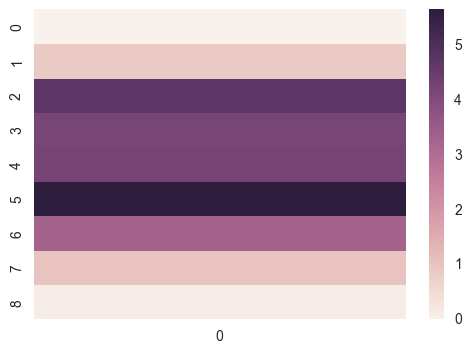

In [25]:
sns.heatmap(std_df[0:9])

Some dimensions will not be helpful in modeling. The heatmap shows that the 0th and 8th (and maybe the 1st and 7th) digit will not be helpful while most of the others wil be relevant.

### ========== Question 2.2 ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

In [26]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition, datasets

In [56]:
logistic = linear_model.LogisticRegression()
pca = PCA(n_components = digits.data.shape[1])
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [28]:
from sklearn.model_selection import GridSearchCV
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X, y)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

ImportError: No module named model_selection

It says that there is no module named model_selection. I am not sure if this has something to do with the version of my jupyter notebook?

### ========== Question 2.3 ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

In [57]:
sns.heatmap(pca.components_[0:9])

AttributeError: 'PCA' object has no attribute 'components_'

### ========== Question 2.4 ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

In [62]:
idx = 0
pca = PCA(n_components=3)
pca.fit(X)
pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()

ValueError: operands could not be broadcast together with shapes (1,64) (1000,) 

*Your answer goes here*

### ========== Question 2.5 ==========

**Challenge question** 

Fit 4 models:
1. SVC with a linear kernel, no shrinking, and a random_state on digit data
1. SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
1. Gaussian Naive Bayes Classifier on digit data
1. Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component pca above)

Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved but the other did not!

In [ ]:
# Your code goes here

*Your answer goes here*